In [2]:
#All the libraries that we will use for data transformation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Import raw data so as not to modify it
raw_df = pd.read_csv("assets/train.csv")

In [6]:
#View raw data info
raw_df.info()
raw_df.describe()
raw_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765201 entries, 0 to 13765200
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   minutes_past           int64  
 2   radardist_km           float64
 3   Ref                    float64
 4   Ref_5x5_10th           float64
 5   Ref_5x5_50th           float64
 6   Ref_5x5_90th           float64
 7   RefComposite           float64
 8   RefComposite_5x5_10th  float64
 9   RefComposite_5x5_50th  float64
 10  RefComposite_5x5_90th  float64
 11  RhoHV                  float64
 12  RhoHV_5x5_10th         float64
 13  RhoHV_5x5_50th         float64
 14  RhoHV_5x5_90th         float64
 15  Zdr                    float64
 16  Zdr_5x5_10th           float64
 17  Zdr_5x5_50th           float64
 18  Zdr_5x5_90th           float64
 19  Kdp                    float64
 20  Kdp_5x5_10th           float64
 21  Kdp_5x5_50th           float64
 22  Kdp_5x5_90th    

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [4]:
# Data Transform
transformed_df = raw_df.groupby('Id').mean()
transformed_df = transformed_df.fillna(0)

In [15]:
#View transformed data and stats
transformed_df.describe()
transformed_df['Expected'].describe()
transformed_df.head()

count    1.180945e+06
mean     1.322453e+02
std      6.030804e+02
min      1.000000e-02
25%      2.540001e-01
50%      1.016001e+00
75%      3.810002e+00
max      3.301773e+04
Name: Expected, dtype: float64

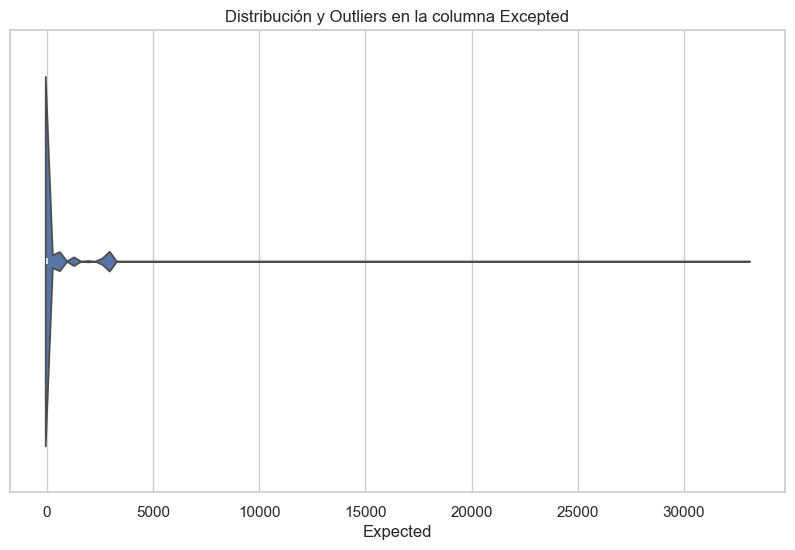

In [5]:
#Violinplot to check outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_df['Expected'])
plt.title('Distribución y Outliers en la columna Excepted')
plt.xlabel('Expected')
plt.show()






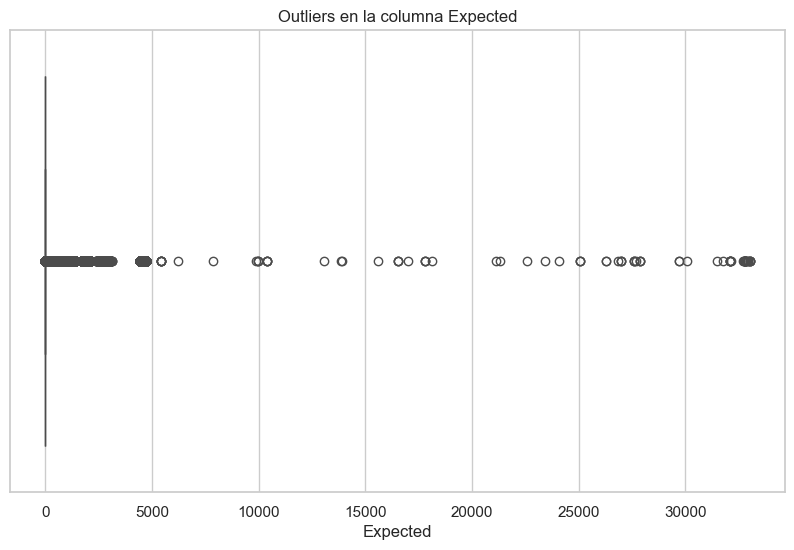

<class 'pandas.core.frame.DataFrame'>
Index: 1180945 entries, 1 to 1180945
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   minutes_past           1180945 non-null  float64
 1   radardist_km           1180945 non-null  float64
 2   Ref                    1180945 non-null  float64
 3   Ref_5x5_10th           1180945 non-null  float64
 4   Ref_5x5_50th           1180945 non-null  float64
 5   Ref_5x5_90th           1180945 non-null  float64
 6   RefComposite           1180945 non-null  float64
 7   RefComposite_5x5_10th  1180945 non-null  float64
 8   RefComposite_5x5_50th  1180945 non-null  float64
 9   RefComposite_5x5_90th  1180945 non-null  float64
 10  RhoHV                  1180945 non-null  float64
 11  RhoHV_5x5_10th         1180945 non-null  float64
 12  RhoHV_5x5_50th         1180945 non-null  float64
 13  RhoHV_5x5_90th         1180945 non-null  float64
 14  Zdr                    

In [12]:
#Boxplot to see 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_df['Expected'])
plt.title('Outliers en la columna Expected')
plt.xlabel('Expected')
plt.show()
transformed_df.info()

Número de registros después de eliminar outliers: 1143831


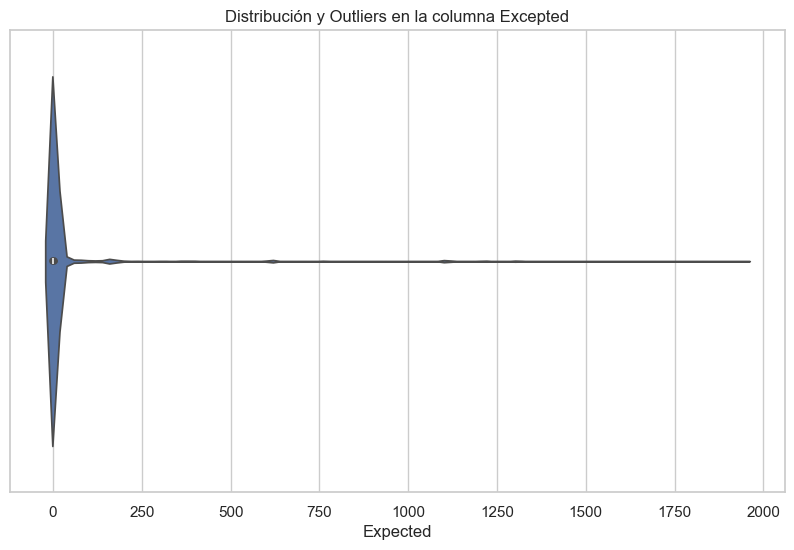

<class 'pandas.core.frame.DataFrame'>
Index: 1143831 entries, 1 to 1180945
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   minutes_past           1143831 non-null  float64
 1   radardist_km           1143831 non-null  float64
 2   Ref                    1143831 non-null  float64
 3   Ref_5x5_10th           1143831 non-null  float64
 4   Ref_5x5_50th           1143831 non-null  float64
 5   Ref_5x5_90th           1143831 non-null  float64
 6   RefComposite           1143831 non-null  float64
 7   RefComposite_5x5_10th  1143831 non-null  float64
 8   RefComposite_5x5_50th  1143831 non-null  float64
 9   RefComposite_5x5_90th  1143831 non-null  float64
 10  RhoHV                  1143831 non-null  float64
 11  RhoHV_5x5_10th         1143831 non-null  float64
 12  RhoHV_5x5_50th         1143831 non-null  float64
 13  RhoHV_5x5_90th         1143831 non-null  float64
 14  Zdr                    

In [13]:
mean = transformed_df['Expected'].mean()
std = transformed_df['Expected'].std()

num_std_dev = 3

lower_bound = mean - num_std_dev * std
upper_bound = mean + num_std_dev * std

cleaned_df = transformed_df[(transformed_df['Expected'] >= lower_bound) & (transformed_df['Expected'] <= upper_bound)]

print("Número de registros después de eliminar outliers:", len(cleaned_df))

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.violinplot(x=cleaned_df['Expected'])
plt.title('Distribución y Outliers en la columna Excepted')
plt.xlabel('Expected')
plt.show()

cleaned_df.info()